# Zestaw 3. Aproksymacja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import cos, sin, floor

## 1. Metoda najmniejszych kwadratów

1. Napisz funkcję, która dla danego zbioru punktów $(x, y) ∈ R^2$
i funkcji aproksymującej f(x) zwróci wartość błędu $\phi = \sum \limits _{k=0}^{m}(y_k − f(x_k))^2$

In [2]:
def count_error(points, f):
    error = 0
    for x, y in points:
        error += (y - f(x))**2
    return error

2. Stwórz wykres błędu $\phi$ w zależności od różnych wartości parametrów a, b; a ∈ [0, 1], b ∈ [−3, 0] funkcji liniowej $f(x) = a x + b$ dla zbioru punktów


In [3]:
points = [(4,2), (7,0), (11,2), (13,6), (17,7)]

In [4]:
a_axis = []
b_axis = []
error_axis = []

for A in np.linspace(0, 1, 10):
    for B in np.linspace(-3, 0, 10):
        a_axis.append(A)
        b_axis.append(B)
        error_axis.append(count_error(points, lambda x: A*x+B))

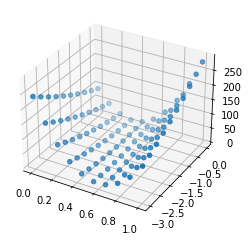

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(a_axis), np.array(b_axis), np.array(error_axis))
plt.show()

3. Napisz funkcję aproksymującą powyższy zbiór punktów funkcją liniową wykorzystując układ normalny. Stwórz wykres prezentujący zbiór punktów i wyliczoną funkcję aproksymującą. Dla wyliczonej funkcji wylicz wartość błędu średniokwadratowego i porównaj go z wynikami z poprzedniego podpunktu. Omów wyniki.

In [6]:
def approximate(points):
    '''f(x) = ax+b'''
    A = np.ones(shape=(len(points), 2))
    B = np.zeros(len(points))
    
    for i, (x, y) in enumerate(points):
        A[i][0] = x
        B[i] = y
    
    a, b = np.linalg.solve(A.T @ A, A.T @ B)
    function = lambda x: a*x + b
    
    return function, count_error(points, function), a, b

In [7]:
function, error, a, b = approximate(points)
print(f'a: {a}, b: {b}')
print(f'approximation error: {error}\n')

print(f'minimum error found {min(error_axis)}')
print(*[(a_axis[i], b_axis[i], error_axis[i]) for i in range(len(a_axis)) if error_axis[i] == min(error_axis)])

a: 0.48643410852713187, b: -1.6589147286821715
approximation error: 10.781007751937986

minimum error found 11.02469135802469
(0.4444444444444444, -1.3333333333333335, 11.02469135802469)


Znajdując wartości błędów dla zmieniających się wartości a i b otrzymaliśmy minimalny błąd równy ok. 11.0 dla $a \approx 0.4$ i $b \approx -1.33 $. Wykorzystując układ normalny, znaleźliśmy współczynniki a i b, o wartościach w okolicach domniemanego wcześniej minimum, dla których wartość błędu jest jeszcze trochę mniejsza.

In [8]:
def plot_approximation(function, points, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
        
    ax.plot([x[0] for x in points], [y[1] for y in points], marker="o", linestyle=" ", color="lightseagreen")
    xs = np.linspace(min(points, key=lambda x: x[0])[0] - 1, max(points, key = lambda x: x[0])[0] + 1, 100)
    ax.plot(xs, function(xs), color="gold", linewidth=2)

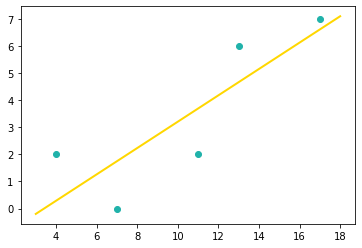

In [9]:
plot_approximation(function, points)

Prosta dopasowana do punktów zdaje się być najlepiej dopasowana, dobrze prezentuje trend zmieniających się wartości y od x.

4. Porównaj wyniki z wykresem wielomianu interpolującego powyższe punkty. Jaka jest przewaga aproksymacji?

In [10]:
def interpolate(points, ax=None):
    '''interpolacja dla węzłów xs, o wartościach w węzłach zadanych funkcją f'''
    n = len(points)
    
    def l(x, k):
        result = 1
        for i in range(n):
            if i == k: continue
            result *= (x - points[i][0])
            result /= (points[k][0] - points[i][0])
        return result
    
    def p(x):
        result = 0
        for i in range(n):
            result += points[i][1]*l(x, i)
        return result
    
    if ax is None:
        fig, ax = plt.subplots()
            
    ax.plot([x[0] for x in points], [y[1] for y in points], marker='o', linestyle='', zorder=10, color = 'darkgoldenrod', markersize=8)
    x_axis = np.linspace(min(points, key=lambda x: x[0])[0] - 1, max(points, key = lambda x: x[0])[0] + 1, 100)
    ax.plot(x_axis, p(x_axis), color="mediumseagreen")

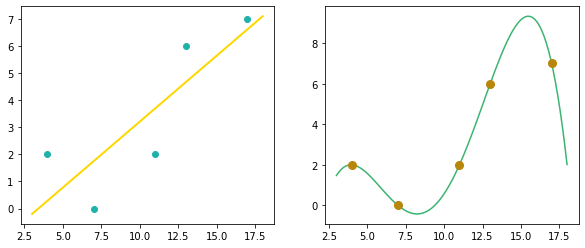

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plot_approximation(function, points, ax[0])
interpolate(points, ax[1])

Dzięki aproksymacji jesteśmy w stanie zauważyć trend i na jego podstawie przewidywać wartości w innych punktach. Jeśli przypuszczamy, iż funkcja opisująca punkty ma charakter zbliżony do liniowego, wówczas aproksymacja funkcją liniową przynosi więcej cennych informacji od interpolacji. Interpolacja nie uwzględnia również faktu, iż wartości punktów w węzłach mogłyby być obarczone błędem, wynikającym chociażby z niedokładności pomiarów.

5. Dodaj do powyższego zbioru danych wartość odstającą, np. (2, 15). W jaki sposób zmieniła się funkcja aproksymująca i jaki jest potencjalny wpływ wartości odstających na aproksymację liniową?

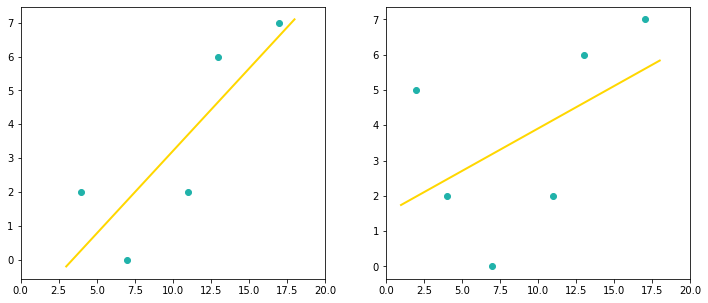

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].set_xlim(0, 20)
ax[1].set_xlim(0, 20)

points = [(4,2), (7,0), (11,2), (13,6), (17,7)]
plot_approximation(approximate(points)[0], points, ax[0])

points += [(2,5)]
plot_approximation(approximate(points)[0], points, ax[1])

Dodając do zbioru danych punkt odstający, prosta regresji zmieniła się znacząco, co sprawia, że nie pasuje ona do zbioru tak dobrze, jak dotychczas. Wartości odstające stanowią problem dla problemu regresji. Ogólnie, nie powinno się automatycznie ignorować takich wartości, chyba że mamy pewność, że wystąpienie takich punktów zaszło w wyniku błędu. Można dopasować model bez tych punktów, jednak uwzględnić pozostałe wartości we wnioskach lub rozważyć zmianę modelu. Są także metody alternatywne do metody najmniejszych kwadratów, które lepiej radzą sobie z wartościami odstającymi. 

## 2. Aproksymacja funkcją nieliniową

1. Napisz funkcję, która dopasuje do danych z poniższej tabeli  funkcję $f(x) = a ln(x) + b cos(x) + c e^x$ metodą najmniejszych kwadratów implementując własnoręcznie układ normalny  dla  tej  funkcji.

#### wyprowadzenie macierzy układu

>$\phi(a, b, c) = \sum \limits_{k=0}^{N-1}(a\ln(x_k)+b\cos(x_k)+ce^{x_k}-y_k)^2$

z warunku koniecznego na istnienie ekstremum funkcji wielu zmiennych:
><center>$\frac{\mathrm{d}\phi}{\mathrm{d}a} = 0 \land
\frac{\mathrm{d}\phi}{\mathrm{d}b} = 0 \land
\frac{\mathrm{d}\phi}{\mathrm{d}c} = 0$ </center>

otrzymujemy 3 równania:
>$
\begin{align}
a\sum \limits_{k=0}^{N-1}\ln(x_k)^2+
b\sum \limits_{k=0}^{N-1}\ln(x_k)\cos(x_k)+
c\sum \limits_{k=0}^{N-1}\ln(x)e^{x_k} 
&= \sum \limits_{k=0}^{N-1}y_k\ln(x_k) \\
a\sum \limits_{k=0}^{N-1}\ln(x_k)\cos(x_k)+
b\sum \limits_{k=0}^{N-1}\cos(x_k)^2+
c \sum \limits_{k=0}^{N-1}e(x_k)\cos(x_k) 
&= \sum \limits_{k=0}^{N-1}y_k\cos(x_k) \\
a\sum \limits_{k=0}^{N-1}\ln(x_k)e^{x_k}+
b\sum \limits_{k=0}^{N-1}\cos(x_k)e^{x_k}+
c\sum \limits_{k=0}^{N-1}(e^{x_k})^2
&= \sum \limits_{k=0}^{N-1}y_ke^{x_k} \\
\end{align}
$

otrzymujemy układ normalny zadany macierzowo:
> A: \begin{bmatrix}
\sum \limits_{k=0}^{N-1}\ln(x_k)^2 & 
\sum \limits_{k=0}^{N-1}\ln(x_k)\cos(x_k) &
\sum \limits_{k=0}^{N-1}\ln(x)e^{x_k} \\
\sum \limits_{k=0}^{N-1}\ln(x_k)\cos(x_k) &
\sum \limits_{k=0}^{N-1}\cos(x_k)^2 &
\sum \limits_{k=0}^{N-1}e(x_k)\cos(x_k) \\
\sum \limits_{k=0}^{N-1}\ln(x_k)e^{x_k} &
\sum \limits_{k=0}^{N-1}\cos(x_k)e^{x_k} &
\sum \limits_{k=0}^{N-1}(e^{x_k})^2
\end{bmatrix}

> X: \begin{bmatrix}
a \\ b \\ c
\end{bmatrix}

> B: \begin{bmatrix}
\sum \limits_{k=0}^{N-1}y_k\ln(x_k) \\
\sum \limits_{k=0}^{N-1}y_k\cos(x_k) \\
\sum \limits_{k=0}^{N-1}y_ke^{x_k}
\end{bmatrix}

><center>$AX = B$ </center>


In [13]:
points = [(0.24, 0.23), (0.65, -0.26), (1.24, -0.45), (1.73, 0.27), (2.01, 0.1), (2.23, -0.29), (2.52, 0.24), (2.77, 0.56), (2.99, 1.0)]

In [14]:
def nonlinear_approximate(points): 
    '''a*lnx + b*cosx + c*exp(x)'''
    A = np.zeros(shape=(3, 3))
    B = np.zeros(3)

    xs = np.array([x[0] for x in points])
    ys = np.array([y[1] for y in points])

    A[0, 0] = np.sum((np.log(xs))**2)
    A[0, 1] = np.sum(np.log(xs)*np.cos(xs))
    A[0, 2] = np.sum(np.log(xs)*np.exp(xs))
    B[0] = np.sum(ys*np.log(xs))

    A[1, 0] = np.sum(np.log(xs)*np.cos(xs))
    A[1, 1] = np.sum(np.cos(xs)**2)
    A[1, 2] = np.sum(np.cos(xs)*np.exp(xs))
    B[1] = np.sum(ys*np.cos(xs))    
    
    A[2, 0] = np.sum(np.log(xs)*np.exp(xs))
    A[2, 1] = np.sum(np.cos(xs)*np.exp(xs))
    A[2, 2] = np.sum(np.exp(xs)**2)
    B[2] = np.sum(ys*np.exp(xs))

    a, b, c = np.linalg.solve(A, B)
    return a, b, c

In [15]:
nonlinear_approximate(points)

(-0.7348670505702516, -0.8086389850515094, 0.03550327360683473)

2. Narysuj  wykres  wyliczonej  funkcji  razem  z  aproksymowanymi punktami. 

In [16]:
def plot_nonlinear_approximation(points):
    a, b, c = nonlinear_approximate(points)

    fig, ax = plt.subplots()
    ax.plot([x[0] for x in points], [y[1] for y in points], linestyle=" ", marker="o", color="darkblue")

    x_axis = np.linspace(min(points, key=lambda x: x[0])[0],
                        max(points, key=lambda x: x[0])[0],
                        200)

    y_axis = a*np.log(x_axis) + b*np.cos(x_axis) + c*np.exp(x_axis)
    ax.plot(x_axis, y_axis, color="lightblue", linewidth=3, zorder=0)

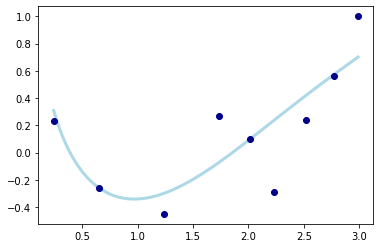

In [17]:
plot_nonlinear_approximation(points)

3. Jakie są ograniczenia na funkcję, którą możemy użyć do aproksymacji średniokwadratowej?

Ogólnie, do aproksymacji średniokwadratowej możemy użyć dowolnej funkcji. Ważne, aby była ona określona w wyróżnionych punktach, a najlepiej określona na całym rozpatrywanym przedziale. 

Dodatkowo, jeśli szukamy rozwiązania w postaci kombinacji liniowej funkcji z jakiejś bazy, to funkcje te muszą być niezależne liniowo, aby dało się rozwiązać układ równań.

Oprócz tego, różne funkcje mogą być inaczej uwarunkowane numerycznie, więc nieodpowiednie ich dobranie może nie dawać dobrych rezultatów.

Najlepiej dobrać takie funkcje, które wydają się najlepiej przybliżać zadany zbiór punktów.

## 3. Przybliżenie Padé

1. Zaimplementuj funkcję która dla funkcji $f(x) =e^{−x}$ wylicza przybliżenie Pade dla zadanych parametrów m i n. Zauważ, że pochodne funkcji f(x) są proste do wyliczenia analitycznie.

In [18]:
def pade_approximate(m, n):
    '''f(x) = exp(-x)'''
    N = m + n 
    a_s = np.ones(N+1)
    for i in range(1, N+1):
        a_s[i] = a_s[i-1]/i

    A = np.zeros(shape=(N, N))
    B = np.zeros(N)

    for i in range(N):
        if i+1 <= n:
            A[i, i] = 1
        for j in range(i+1):
            if j+1 <= m:
                A[i, n+j] = -a_s[i-j]

        B[i] = a_s[i+1]
    
    result = np.linalg.solve(A, B)
    qs = result[:n]
    ps = result[n:]
    return ps, qs

2. Wypisz wyliczone współczynniki funkcji wymiernej.

In [19]:
ps, qs = pade_approximate(3, 2)
print('współczynniki przy kolejnych potęgach x zaczynając od zerowej')
print(f'licznik (p): 1 {" ".join(map(lambda x: str(round(x, 2)), ps))}')
print(f'mianownik (q): 1 {" ".join(map(lambda x: str(round(x, 2)), qs))}')

współczynniki przy kolejnych potęgach x zaczynając od zerowej
licznik (p): 1 -0.6 0.15 -0.02
mianownik (q): 1 0.4 0.05


3. Zaprezentuj na wykresie funkcję f oraz jej wyliczoną aproksymację.

In [20]:
def plot_pade_approximation(m, n, ax=None):
    if ax is None:
        _, ax = plt.subplots()

    ps, qs = pade_approximate(m, n)

    def pade_function(x, ps, qs):
        numerator = 1
        for i, p in enumerate(ps):
            numerator += p*x**(i+1)

        denominator = 1
        for i, q in enumerate(qs):
            denominator += q*x**(i+1)
        
        return numerator/denominator

    ax.set_title(f'm = {m}, n = {n}')
    ax.set
    
    x_axis = np.linspace(-5, 50, 200)
    ax.plot(x_axis, np.exp(-x_axis), color="plum", label="exp(-x)")

    ax.plot(x_axis, list(map(lambda x: pade_function(x, ps, qs), x_axis)), color="indigo", label="pade approximation")
    ax.legend()

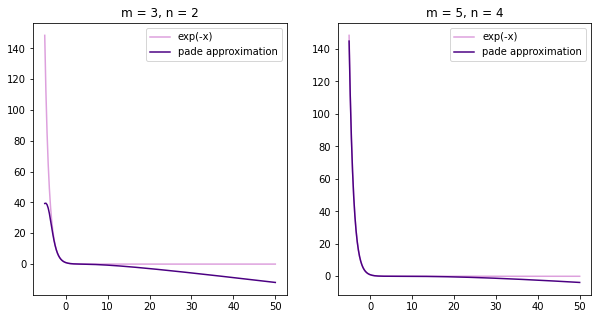

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_pade_approximation(3, 2, ax[0])
plot_pade_approximation(5, 4, ax[1])

Aproksymacja Pade bardzo dobrze przybliża zadaną funkcję i to dla stosunkowo niedużych wartości m i n. Błąd przybliżenia jest tym większy, im bardziej oddalamy się od zera. Dla argumentów ujemnych błąd można zauważyć dużo szybciej, wynika to prawdopodobnie z ogromnych wartości obydwu funkcji, wynikających z natury funkcji eksponencjalnej. 

Przybliżenie Pade daje lepsze rezultaty niż rozwinięcie w wielomian za pomocą twierdzenia Taylora. Jako iż wielomian da się przedstawić jako funkcję wymierną o mianowniku będącym funkcją stale równą 1, metoda Padego jest swego rodzaju rozszerzeniem i ulepszeniem metody z wielomianami.

## Wnioski

- Metoda najmniejszych kwadratów pozwala znaleźć dobrą aproksymację funkcji zadanej punktami. Aproksymacja może być tworzona za pomocą różnych funkcji, nie tylko funkcji liniowej.
- Aproksymacja Padego często daje lepszy wynik niż zwykłe rozwinięcie w wielomian Maclaurina.

M. Hawryluk 06.04.2021